In [1]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib

In [2]:
from ivim_tensor import IvimTensorModel

In [3]:
from dipy.core.gradients import gradient_table

In [4]:
gtab = gradient_table('./data/DWI_IVIM6.bval', './data/DWI_IVIM6.bvec', b0_threshold=0)

In [5]:
img = nib.load('./data/DWI_IVIM6.nii')

In [6]:
data = img.get_fdata()

In [7]:
b0 = np.mean(data[..., gtab.b0s_mask], -1)

In [8]:
from dipy.segment.mask import median_otsu
b0_mask, mask = median_otsu(b0, median_radius=2, numpass=1)

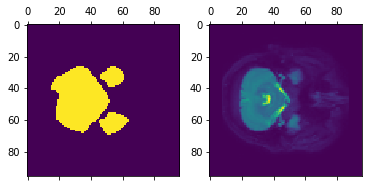

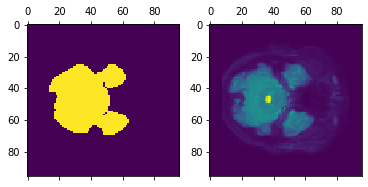

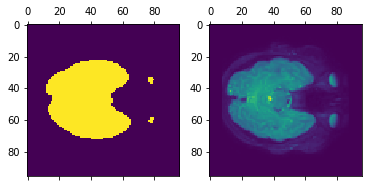

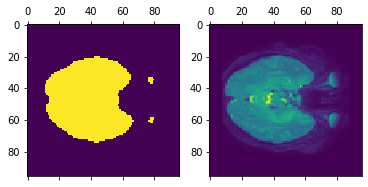

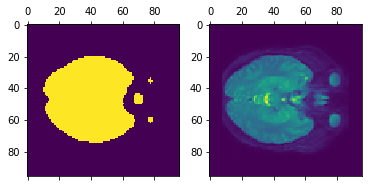

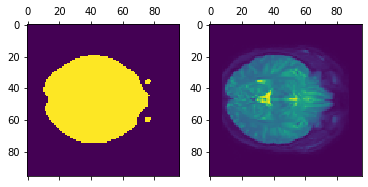

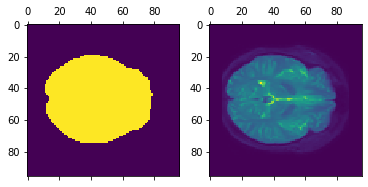

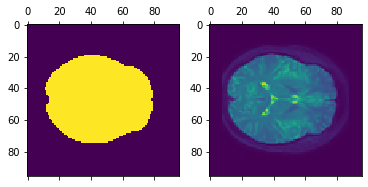

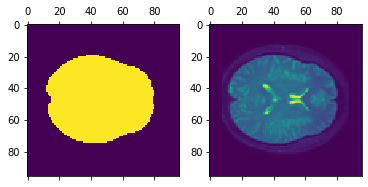

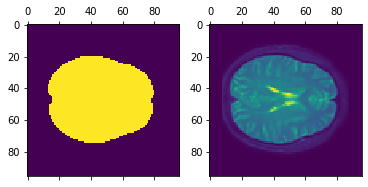

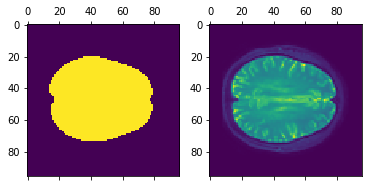

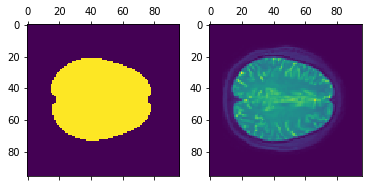

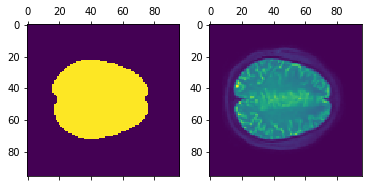

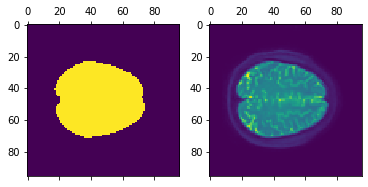

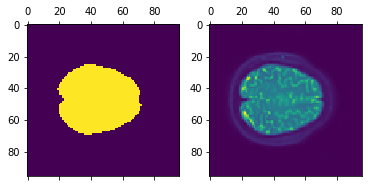

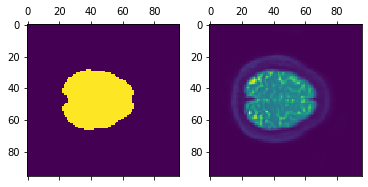

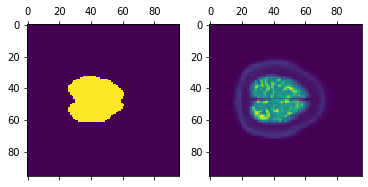

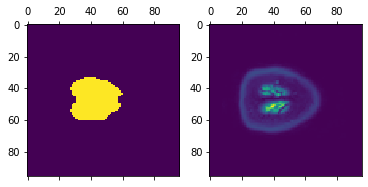

In [9]:
for sl in range(mask.shape[-1]):
    fig, ax = plt.subplots(1, 2)
    ax[0].matshow(mask[:, :, sl])
    ax[1].matshow(data[:, :, sl, 0])

In [10]:
itm = IvimTensorModel(gtab)

/srv/conda/envs/notebook/lib/python3.7/site-packages/dipy/reconst/ivim.py:151: UserWarning: Bounds for this fit have been set from experiments and literature survey. To change the bounds, please input your bounds in model definition...
  warnings.warn(bounds_warning, UserWarning)


In [ ]:
itf = itm.fit(data, mask)

/srv/conda/envs/notebook/lib/python3.7/site-packages/dipy/reconst/ivim.py:434: UserWarning: x0 obtained from linear fitting is not feasibile as initial guess for leastsq while estimating f and D_star. Using parameters from the linear fit.
  warnings.warn(warningMsg, UserWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/dipy/reconst/ivim.py:507: UserWarning: x0 is unfeasible for leastsq fitting. Returning x0 values from the linear fit.
  warnings.warn(warningMsg, UserWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/dipy/reconst/ivim.py:344: UserWarning: Bounds are violated for leastsq fitting. Returning parameters from linear fit
  warnings.warn(warningMsg, UserWarning)
 34%|███▎      | 12950/38420 [09:12<17:40, 24.02it/s]

In [ ]:
np.save('model_params', itf.model_params)

In [ ]:
itf.model_params.shape

In [ ]:
itf.perfusion_fraction.shape

In [ ]:
plt.hist(itf.perfusion_fraction)

In [ ]:
pf = np.zeros(mask.shape)

In [ ]:
pf[mask] = itf.perfusion_fraction

In [ ]:
np.sum(np.isnan(itf.perfusion_fraction)) / len(itf.perfusion_fraction)

In [ ]:
for sl in range(pf.shape[-1]):
    plt.matshow(pf[:, :, sl])

In [ ]:
diffusion_cfa = np.zeros((mask.shape + (3,)))

In [ ]:
diffusion_cfa[mask] = itf.diffusion_fit.color_fa

In [ ]:
ivim_pf = np.zeros(mask.shape)

In [ ]:
ivim_pf[mask] = itf.model.ivim_fit.perfusion_fraction

In [ ]:
for sl in range(mask.shape[-1]):
    fig, ax = plt.subplots(1, 3, figsize=(10, 8))
    ax[0].imshow(pf[:, :, sl])
    ax[1].imshow(diffusion_cfa[:, :, sl])
    ax[2].imshow(ivim_pf[:, :, sl])

In [ ]:
perfusion_cfa = np.zeros((mask.shape + (3,)))

In [ ]:
perfusion_cfa[mask] = itf.perfusion_fit.color_fa

In [ ]:
for sl in range(mask.shape[-1]):
    fig, ax = plt.subplots()
    ax.imshow(perfusion_cfa[:, :, sl])

In [ ]:
import nibabel as nib

In [ ]:
nib.save(nib.Nifti1Image(pf, img.affine), 'perfusion_fraction.nii.gz')

In [ ]:
data[np.where(np.isnan(pf))[0]]